# Strava Data Analysis

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from stravalib.client import Client
from stravalib import unithelper

In [5]:
client = Client()

client = Client(access_token = '..')
athlete = client.get_athlete()

Check API linked okay, print recent activities:

In [27]:
for activity in client.get_activities(after = "2018-03-01T00:00:00Z"):
    print("{0.name} {0.moving_time} {0.id}".format(activity))

Turbo life 0:42:14 1432994379
4RP, nice to be out... 2:05:04 1435608802
Morning Ride 0:12:03 1437911386
ReP 1:26:52 1437912309


## Turbo Data

In [30]:
streams.keys()

dict_keys(['latlng', 'time', 'heartrate', 'velocity_smooth'])

In [37]:
activities = client.get_activities()
turbo_ids = []

for activity in activities:
    if activity.trainer:
        turbo_ids.append("{0.id}".format(activity))

In [48]:
# Not sure how to get rid of warning...

In [41]:
average_speeds = []
dates = []
for i in turbo_ids:
    activity = client.get_activity(int(i))
    average_speeds.append(activity.average_speed)
    dates.append(activity.start_date)

No such attribute leaderboard_opt_out on entity <Activity id=1432994379 name='Turbo life' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1430463012 name='Turbo - over & unders' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1427444399 name='Turbo' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1420373146 name='Turbo - tempo' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1417628293 name='Turbo' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1386237579 name='Turbo' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1372788627 name='Turbo' resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1318822417 name="Wattbike @ Vi's gym" resource_state=3>
No such attribute leaderboard_opt_out on entity <Activity id=1311866347 name='Turbo' resource_state=3>
No such attribute leaderboard_

In [46]:
turbo_data = pd.DataFrame({'date': dates, 'speed': average_speeds})

turbo_data['speed'] = turbo_data['speed'].apply(lambda x: unithelper.miles_per_hour(x).num)
turbo_data['power'] = turbo_data['speed'].apply(lambda x: 0.0115 * x * x * x - 0.0137 * x * x + 8.9788 * x)

turbo_data['date'] = turbo_data['date'].apply(lambda x: x.date())
turbo_data = turbo_data.sort_values(['date'])

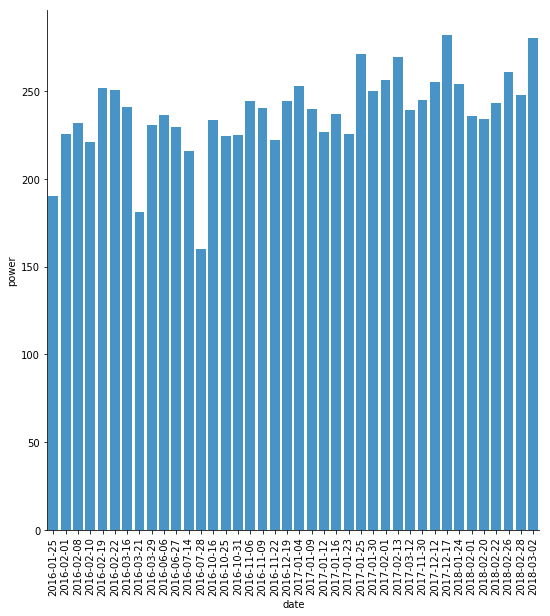

In [47]:
p = sns.factorplot(data = turbo_data, x = 'date', y = 'power',
                   size = 8, kind = 'bar', palette = sns.color_palette(["#3498db"]))
p.set_xticklabels(rotation = 90)
plt.show()

## Richmond Park Times

In [7]:
segments = client.get_segment_efforts(610040)

times = []
dates = []
for segment in segments:
    times.append("{0.elapsed_time}".format(segment))
    dates.append("{0.start_date}".format(segment))
    
rp_times = pd.DataFrame({'date': dates, 'time': times})

rp_times['date'] = pd.to_datetime(rp_times['date'])
rp_times['date'] = rp_times['date'].apply(lambda x: x.date())

rp_times['seconds'] = rp_times['time'].apply(lambda x: int(x[2:4]) * 60 + int(x[5:]))

rp_times = rp_times.sort_values(['date'])

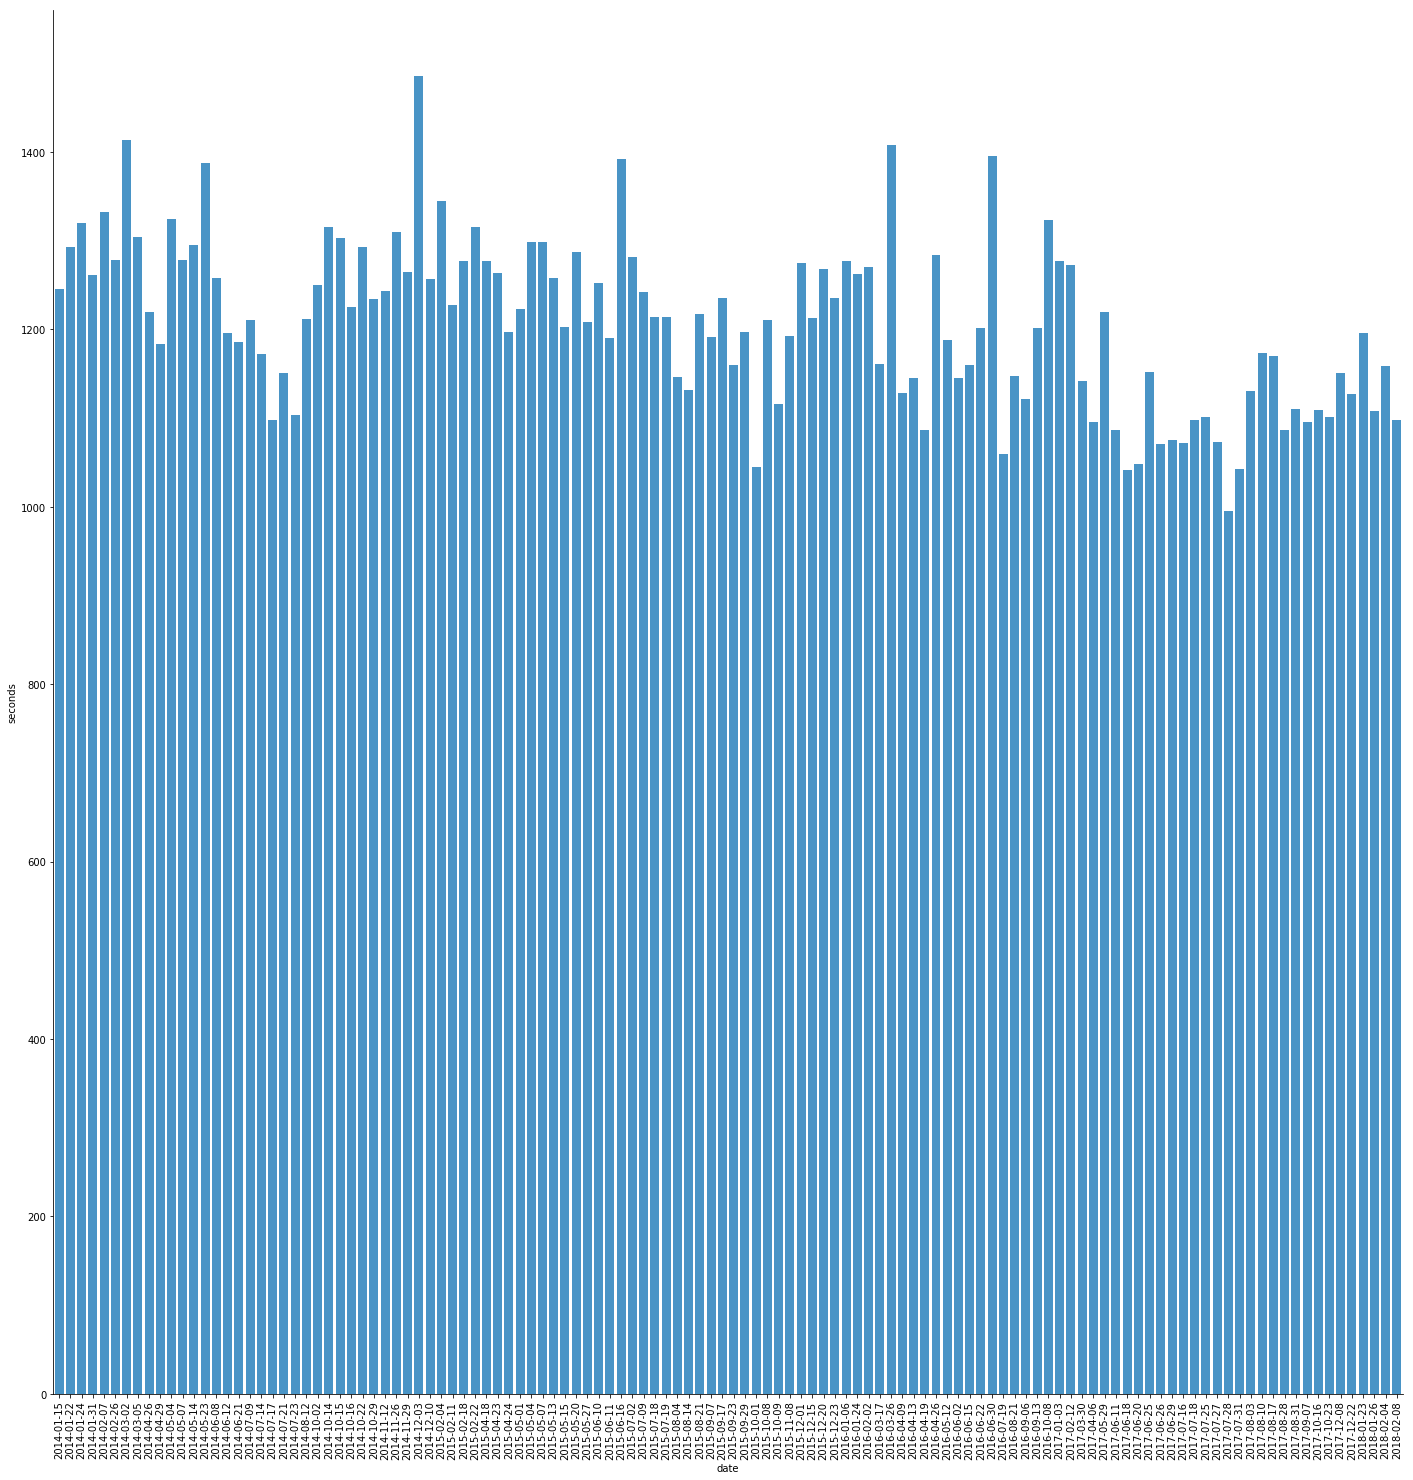

In [26]:
p = sns.factorplot(data = rp_times[rp_times['seconds'] < 1500], x = 'date', y = 'seconds', ci = None,
                   size = 20, kind = 'bar', palette = sns.color_palette(["#3498db"]))
p.set_xticklabels(rotation = 90)
plt.show()